In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import cma
import math
import numba
import os
from tqdm import tqdm
import scipy.stats as st

C:\Users\Sofia\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Sofia\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#params
##data
amp, centre, sigma = (0.6969641043116005, 1.4904524578404597, 1.3102271681828053)

x_data = [0, 3, 6, 10, 20]

Aktp_data = [1.6, 2.3, 1.87, 1.8, 0.66]
Agop_data = [1.5, 2.6, 2.9, 2.1, 0.79]
Agopgw_data = [1.2, 1.5, 2.85, 2.15, 1.07]

Aktp_data_SEM = [0.17, 0.19, 0.26, 0.7, 0.27]
Agop_data_SEM = [0.22, 0.57, 0.23, 0.17, 0.42]
Agopgw_data_SEM = [0.0, 0.11, 0.21, 0.18, 0.17]

x_data2 = [-60, -30, -5, 0, 3, 6, 10, 20]

Aktp_data2 = [1, 1, 1, 1.6, 2.3, 1.87, 1.8, 0.66]
Agop_data2 = [1, 1, 1, 1.5, 2.6, 2.9, 2.1, 0.79]
Agopgw_data2 = [1, 1, 1, 1.2, 1.5, 2.85, 2.15, 1.07]

Aktp_data_SEM2 = [0.32, 0.32, 0.32, 0.17, 0.19, 0.26, 0.7, 0.27]
Agop_data_SEM2 = [0.32, 0.32, 0.32, 0.22, 0.57, 0.23, 0.17, 0.42]
Agopgw_data_SEM2 = [0.36, 0.36, 0.36, 0.0, 0.11, 0.21, 0.18, 0.17]


pAG = {'dmso_basal': [0.6627906976744186, 0.790697674418605, 1.5697674418604648],
       'dmso_nmda': [1.8604651162790693, 1.6976744186046513, 1.837209302325581],
       'iakt_basal': [0.3953488372093027, 0.25581395348837255, 0.27906976744186024],
       'iakt_nmda': [0.45348837209302284, 0.3255813953488376, 0.4418604651162791]}

pA = {'dmso_basal': [0.9122807017543857, 0.7456140350877186, 0.842105263157895],
      'dmso_nmda': [2.0526315789473677, 1.5877192982456136, 1.6403508771929818],
      'iakt_basal': [0.23684210526315913, 0.10526315789473667, 0.2192982456140353],
      'iakt_nmda': [0.04385964912280802, 0.20175438596491302, 0.27192982456140363]}

data = np.array([[Aktp_data], [Agop_data], [Agopgw_data]])
data_sem = np.array([[Aktp_data_SEM], [Agop_data_SEM], [Agopgw_data_SEM]])

data2 = np.array([[Aktp_data2], [Agop_data2], [Agopgw_data2]])
data_sem2 = np.array([[Aktp_data_SEM2], [Agop_data_SEM2], [Agopgw_data_SEM2]])

nmda_x = [108.77762801045833-120, 125.66705100930517-120, 147.06140279649867-120, 168.61165694983492-120, 188.7003264205789-120, 208.8734430063173-120, 224.78198028484644-120, 252.21430079412767-120, 266.70672491352275-120, 292.67421277425-120, 308.54702242720464-120, 327.3170177176539-120, 350.40031180473215-120, 369.15731523133604-120,]
nmda_y = [0.2911963882618509, 0.5530474040632054, 0.6839729119638827, 0.7065462753950338, 0.7449209932279908, 0.7246049661399547, 0.6681715575620766, 0.6027088036117381, 0.5304740406320541, 0.4830699774266365, 0.4514672686230248, 0.4063205417607221, 0.3634311512415347, 0.3273137697516928,]
nmda_sem = [0.3702031602708802, 0.6817155756207673, 0.8600451467268622, 0.8893905191873588, 0.9638826185101579, 0.9480812641083518, 0.8781038374717831, 0.8239277652370203, 0.7223476297968396, 0.6681715575620766, 0.6094808126410833, 0.5643340857787809, 0.5079006772009027, 0.46275395033860045]
nmda_sem = np.array(nmda_sem) - np.array(nmda_y)
nmda_x = np.array(nmda_x) / 60

nmda_y = np.array(nmda_y)

##others
dt = 0.01
minutes = 20
numtimesteps = minutes/dt #100

#rate constants
k1, k_1, k2, k_2, k3, k_3, Akt_init, Aktp_init, \
Ago_init, Agop_init, Gw_init, Agopgw_init = [-2.1891086172494694, -2.4433488194546342, -24.246747947385302, \
                                             0.3097092957302445, -5.566253607295039, -0.529244446408704, \
                                             -7.789006960185361, -9.934601074801321, 9.036872136090096, \
                                             -25.710634963063058, -20.33791222058062, -51.037103097041836]

rates = [k1, k_1, k2, k_2, k3, k_3]
inits = [Akt_init, Aktp_init,  Ago_init, Agop_init, Gw_init, Agopgw_init]

theta = np.array(rates + inits)

beg = 0
beg2 = -10

In [3]:
def model1(theta, nmda = True, iakt = False):
   
    def gauss(x, amp, centre, sigma):
        return amp*np.exp(-(x - centre)**2 / (2*sigma)**2)
   
    k1, k_1, k2, k_2, k3, k_3, Akt0, Aktp0, Ago0, Agop0, Gw0, Agopgw0 = np.exp(theta)
    
    if iakt == True:
        k1 = 0
    else:
        k1 = k1
   
    Akt = np.zeros(int((minutes - beg)/dt))
    Aktp = np.zeros(int((minutes - beg)/dt))
    Ago = np.zeros(int((minutes - beg)/dt))
    Agop = np.zeros(int((minutes - beg)/dt))
    Gw = np.zeros(int((minutes - beg)/dt))
    Agopgw = np.zeros(int((minutes - beg)/dt))
    time = np.linspace(int(beg), int(minutes), int((minutes-beg)/dt))
   
    if nmda == True:
        NMDA = gauss(time, amp, centre, sigma)
    else:
        NMDA = np.zeros(int((minutes-beg)/dt))
                
    Akt[0] = Akt0
    Aktp[0] = Aktp0
    Ago[0] = Ago0
    Agop[0] = Agop0
    Gw[0] = Gw0
    Agopgw[0] = Agopgw0
   
    for i in range(1, int((minutes-beg)/dt)):
        Akt[i] = Akt[i-1] + dt*(Aktp[i-1]*k_1 - Akt[i-1]*k1*NMDA[i])
        Aktp[i] = Aktp[i-1] + dt*(Akt[i-1]*k1*NMDA[i] - Aktp[i-1]*k_1)
        Ago[i] = Ago[i-1] + dt*(Agop[i-1]*k_2 - Aktp[i-1]*Ago[i-1]*k2)
        Agop[i] = Agop[i-1] + dt*(Aktp[i-1]*Ago[i-1]*k2 + Agopgw[i-1]*k_3 - Agop[i-1]*k_2 - Agop[i-1]*Gw[i-1]*k3)
        Gw[i] = Gw[i-1] + dt*(Agopgw[i-1]*k_3 - Agop[i-1]*Gw[i-1]*k3)
        Agopgw[i] = Agopgw[i-1] + dt*(Agop[i-1]*Gw[i-1]*k3 - Agopgw[i-1]*k_3)
       
    return Akt, Aktp, Ago, Agop, Gw, Agopgw, NMDA, time

#first simple model function fc calculation
def foldChange1(theta, nmda = True, iakt = False):
    Akt, Aktp, Ago, Agop, Gw, Agopgw, NMDA, time = model1(theta, nmda, iakt)
   
    Aktp_fold = np.zeros(len(Akt))
    Agop_fold = np.zeros(len(Akt))
    Agopgw_fold = np.zeros(len(Akt))
   
    for i in range(len(Akt)):
            Aktp_fold[i] = Aktp[i] / ( Aktp[0] )#+ Akt[0]) / akcont
            Agop_fold[i] = (Agop[i] + Agopgw[i]) / ( Agop[0]  + Agopgw[0] )#+ Ago[0] ) / agcont
            Agopgw_fold[i] = Agopgw[i] / ( Agopgw[0] )#+ Gw[0]) / gwcont
           
    return Aktp_fold, Agop_fold, Agopgw_fold, time

In [4]:
pR_basal, pA_basal, pAG_basal, time_bd = foldChange1(theta, nmda = False)
pR_nmda, pA_nmda, pAG_nmda, time_dmso = foldChange1(theta)

In [5]:
iAkt_pR_basal, iAkt_pA_basal, iAkt_pAG_basal, time_id = foldChange1(theta, nmda = False, iakt = True)
iAkt_pR_nmda, iAkt_pA_nmda, iAkt_pAG_nmda, time_iakt = foldChange1(theta, iakt = True)

In [6]:
np.interp(10, time_iakt, iAkt_pA_nmda)

0.5790681190071432

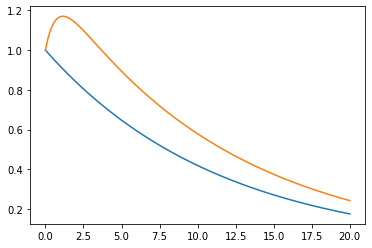

In [7]:
fig, ax = plt.subplots()

ax.plot(time_iakt,
        iAkt_pR_nmda)
ax.plot(time_iakt,
        iAkt_pA_nmda)

In [8]:
x = [1, 2]
w = 0.15
names = ['DMSO', 'Akti-1/2']

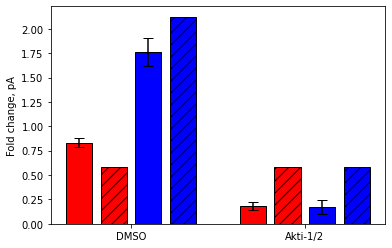

In [9]:
fig, ax = plt.subplots()

ax.bar(0.7,
       height = np.mean(np.array(pA['dmso_basal'])),
       yerr = st.sem(np.array(pA['dmso_basal'])),
       color = 'red',
       ecolor = 'black',
       edgecolor = 'black',
       capsize = 5, 
      width = w)
ax.bar(0.9,
       np.interp(10, time_bd, pA_basal),
       color = 'red',
       hatch = '//',
       edgecolor = 'black', 
      width = w)
ax.bar(1.1,
       height = np.mean(np.array(pA['dmso_nmda'])),
       yerr = st.sem(np.array(pA['dmso_nmda'])),
       color = 'blue',
       ecolor = 'black',
       edgecolor = 'black',
       capsize = 5, 
      width = w)
ax.bar(1.3,
       np.interp(10, time_dmso, pA_nmda),
       color = 'blue',
       hatch = '//',
       edgecolor = 'black', 
      width = w)

ax.bar(1.7,
       height = np.mean(np.array(pA['iakt_basal'])),
       yerr = st.sem(np.array(pA['iakt_basal'])),
       color = 'red',
       ecolor = 'black',
       edgecolor = 'black',
       capsize = 5, 
      width = w)
ax.bar(1.9,
       np.interp(10, time_id, iAkt_pA_basal),
       color = 'red',
       hatch = '//',
       edgecolor = 'black', 
      width = w)
ax.bar(2.1,
       height = np.mean(np.array(pA['iakt_nmda'])),
       yerr = st.sem(np.array(pA['iakt_nmda'])),
       color = 'blue',
       ecolor = 'black',
       edgecolor = 'black',
       capsize = 5, 
      width = w)
ax.bar(2.3,
       np.interp(10, time_iakt, iAkt_pA_nmda),
       color = 'blue',
       hatch = '//',
       edgecolor = 'black', 
      width = w)

plt.xticks(x, names)

#ax.set_ylim(0,5)

ax.set_ylabel('Fold change, pA')

plt.savefig('./replicate_data-pA.svg', dpi = 600, bbox_inches = 'tight')

plt.show()

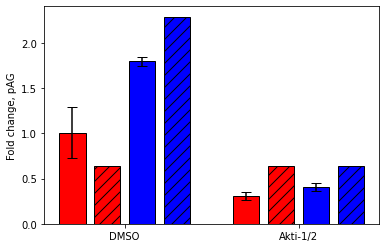

In [10]:
fig, ax = plt.subplots()

ax.bar(0.7,
       height = np.mean(np.array(pAG['dmso_basal'])),
       yerr = st.sem(np.array(pAG['dmso_basal'])),
       color = 'red',
       ecolor = 'black',
       edgecolor = 'black',
       capsize = 5, 
      width = w)
ax.bar(0.9,
       np.interp(10, time_bd, pAG_basal),
       color = 'red',
       hatch = '//',
       edgecolor = 'black', 
      width = w)
ax.bar(1.1,
       height = np.mean(np.array(pAG['dmso_nmda'])),
       yerr = st.sem(np.array(pAG['dmso_nmda'])),
       color = 'blue',
       ecolor = 'black',
       edgecolor = 'black',
       capsize = 5, 
      width = w)
ax.bar(1.3,
       np.interp(10, time_dmso, pAG_nmda),
       color = 'blue',
       hatch = '//',
       edgecolor = 'black', 
      width = w)

ax.bar(1.7,
       height = np.mean(np.array(pAG['iakt_basal'])),
       yerr = st.sem(np.array(pAG['iakt_basal'])),
       color = 'red',
       ecolor = 'black',
       edgecolor = 'black',
       capsize = 5, 
      width = w)
ax.bar(1.9,
       np.interp(10, time_id, iAkt_pAG_basal),
       color = 'red',
       hatch = '//',
       edgecolor = 'black', 
      width = w)
ax.bar(2.1,
       height = np.mean(np.array(pAG['iakt_nmda'])),
       yerr = st.sem(np.array(pAG['iakt_nmda'])),
       color = 'blue',
       ecolor = 'black',
       edgecolor = 'black',
       capsize = 5, 
      width = w)
ax.bar(2.3,
       np.interp(10, time_iakt, iAkt_pAG_nmda),
       color = 'blue',
       hatch = '//',
       edgecolor = 'black', 
      width = w)

plt.xticks(x, names)

#ax.set_ylim(0,5)

ax.set_ylabel('Fold change, pAG')

plt.savefig('./replicate_data-pAG.svg', dpi = 600, bbox_inches = 'tight')

plt.show()